In [1]:
cd ../Python/

/home/mfruman/DataSci/PBN/Python


In [2]:
import readPBNData.description as rd
import readPBNData.images as ri
import PBNFeatures.paletteTools as pt
import PBNPCA.pca as pbnpca
import numpy as np

In [3]:
# images in train_1.zip and train_2.zip file
train_1_names = rd.imagesInZip('../Data/train_1.zip')
train_2_names = rd.imagesInZip('../Data/train_2.zip')

In [4]:
# show (full) image
def showImage(imgName):
    if (imgName in train_1_names):
        ri.openZipImage('../Data/train_1.zip', \
                        imgName, \
                        prefix='train_1' \
                       ).show()
    else:
        ri.openZipImage('../Data/train_2.zip', \
                        imgName, \
                        prefix='train_2' \
                       ).show()

In [7]:
# load all the json data
import os.path
import json
dataDir = '../Data/'
featureDir = '../Data/'

portfoliosFile = dataDir + 'portfolios_top10.json'
if (os.path.isfile(portfoliosFile)):
    with open(portfoliosFile,'r') as jsonfile:
        portfolios_uni = json.load(jsonfile)
        print('reading portfolios !!!')

namesFile = featureDir + 'names_top10.json'
if (os.path.isfile(namesFile)):
    with open(namesFile,'r') as jsonfile:
        names = json.load(jsonfile)
        print('reading names file . . .')        
        
nc = 16
palette = pt.CGApalette(ncolours=nc)
cgaColoursFile = featureDir + 'cgacolours_top10.json'
if (os.path.isfile(cgaColoursFile)):
    with open(cgaColoursFile,'r') as jsonfile:
        data = json.load(jsonfile)
        print('reading CGA Colours file . . .')

hsvstatsFile = featureDir + 'hsvstats_top10.json'
if (os.path.isfile(hsvstatsFile)):
    with open(hsvstatsFile,'r') as jsonfile:
        hsvstats = json.load(jsonfile)
        print('reading hsvstats file . . .')

focusstatsFile = featureDir + 'focusstats_top10.json'
if (os.path.isfile(focusstatsFile)):
    with open(focusstatsFile,'r') as jsonfile:
        focusstats = json.load(jsonfile)
        print('reading focusstats file . . .')



reading portfolios !!!
reading names file . . .
reading CGA Colours file . . .
reading hsvstats file . . .
reading focusstats file . . .


## Generate random pairs of paintings by same and different paintings

In [8]:
# prepare 1000 pairs of paintings by same artist 
# and 1000 pairs by different artists
import random
npairs = 1000
randomSeed = 667
random.seed(randomSeed)
pairs = []
for isample in xrange(npairs):
    # randomly choose an artist
    portfolio = random.choice(portfolios_uni)
    # randomly choose two paintings
    paintings = random.sample(portfolio[1],2)
    pairs.append([paintings[0],paintings[1],1])
for isample in xrange(npairs):
    # randomly choose two artists
    portfoliopair = random.sample(portfolios_uni,2)
    # randomly choose a painting from each artist
    paintings = random.choice(portfoliopair[0][1]), random.choice(portfoliopair[1][1])
    pairs.append([paintings[0],paintings[1],0])

In [9]:
pairs[:8]

[[u'16177.jpg', u'15792.jpg', 1],
 [u'11309.jpg', u'17411.jpg', 1],
 [u'1330.jpg', u'24678.jpg', 1],
 [u'21588.jpg', u'101402.jpg', 1],
 [u'101436.jpg', u'22733.jpg', 1],
 [u'101773.jpg', u'16796.jpg', 1],
 [u'17678.jpg', u'25976.jpg', 1],
 [u'2919.jpg', u'19882.jpg', 1]]

In [27]:
# load a single pair of miniatures
def loadMiniPair(pair):
    import os.path
    import PIL.Image as Image
    featureDir = '../Data/Mini/'
    name0 = os.path.splitext(pair[0])[0] + '_mini_100_x_100.jpg'
    mini0 = Image.open(featureDir + name0)
    name1 = os.path.splitext(pair[1])[0]+'_mini_100_x_100.jpg'
    mini1 = Image.open(featureDir + name1)
    return mini0, mini1

def loadCutoutPair(pair,topleft=(25,25)):
    import os.path
    import PIL.Image as Image
    featureDir = '../Data/Cutout/'
    crnrstr = 'corner_' + str(topleft[0]) + '_' + str(topleft[1])
    name0 = os.path.splitext(pair[0])[0] + '_cutout_100_x_100_' + crnrstr + '.jpg'
    cutout0 = Image.open(featureDir + name0)
    name1 = os.path.splitext(pair[1])[0]+'_cutout_100_x_100_' + crnrstr + '.jpg'
    cutout1 = Image.open(featureDir + name1)
    return cutout0, cutout1

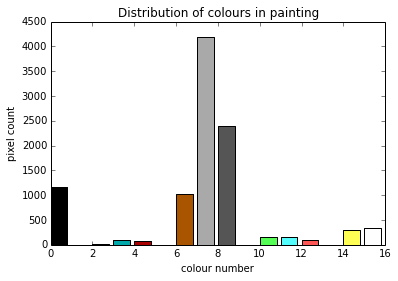

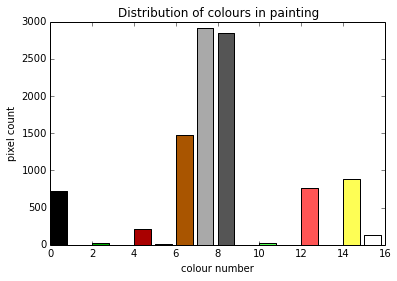

In [16]:
# load a pair by the same artist
pairnum = 999
mini1, mini2 = loadMiniPair(pairs[pairnum])
# show (full) images
#showImage(pairs[pairnum][0])
#showImage(pairs[pairnum][1])


# compare colour distribution in simplified palette between
# members of the pair
%matplotlib inline
import matplotlib.pyplot as plt
palette = pt.CGApalette(ncolours=16)

mini1p = pt.paletteConvert(mini1,palette)
mini2p = pt.paletteConvert(mini2,palette)

pt.plotColourDistribution(mini1p.getcolors(),pt.unflatten(palette))
pt.plotColourDistribution(mini2p.getcolors(),pt.unflatten(palette))

plt.show()

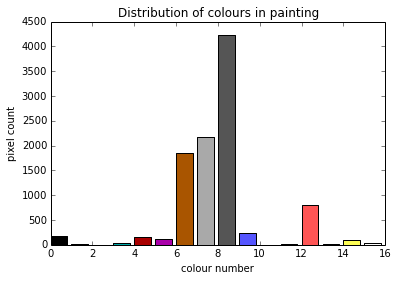

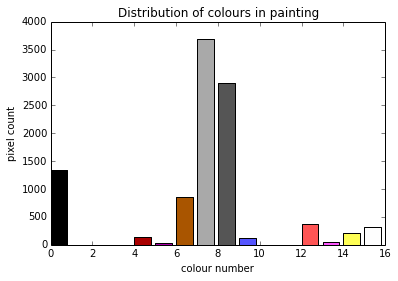

In [17]:
# repeat for a pair by different artists
# load a pair by the same artist
pairnum = 1001
mini1, mini2 = loadMiniPair(pairs[pairnum])
# show (full) images
#showImage(pairs[pairnum][0])
#showImage(pairs[pairnum][1])

mini1p = pt.paletteConvert(mini1,palette)
mini2p = pt.paletteConvert(mini2,palette)

pt.plotColourDistribution(mini1p.getcolors(),pt.unflatten(palette))
pt.plotColourDistribution(mini2p.getcolors(),pt.unflatten(palette))

plt.show()

## Pairwise comparisons based on CGA data

mean distance for sames, diffs:
(13943620.536, 16302159.806)




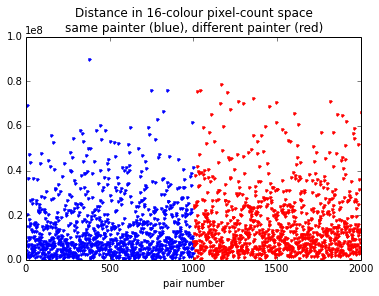

mean distance for sames, diffs:
(621.70399999999995, 641.14599999999996)




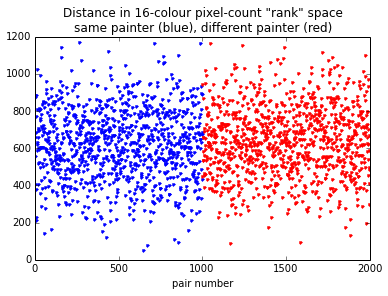

mean distance for sames, diffs:
(2.2549999999999999, 2.6230000000000002)




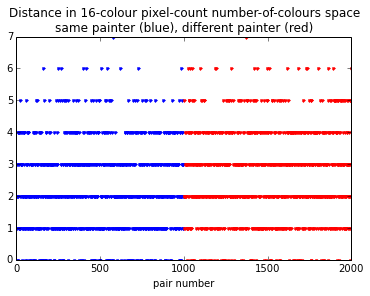

mean distance for sames, diffs:
(3.1219999999999999, 2.9289999999999998)




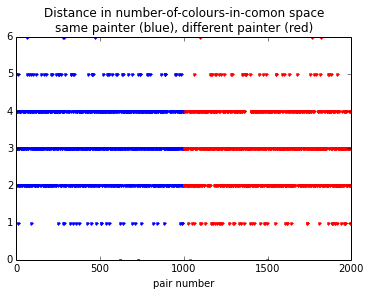

In [18]:
# for all pairs in "pairs", compute distances in colour space
import math
distance = []
for pair in pairs:
    inds = names.index(pair[0]), names.index(pair[1])
    distance.append(sum((x1-data[inds[1]][i])**2 for i,x1 in enumerate(data[inds[0]])))
print('mean distance for sames, diffs:')
print(np.mean(distance[:npairs]), np.mean(distance[-npairs:]))
print('\n')

# plot Euclidean distance in pixel-count space for
# pairs that are by same artist (blue) and
# pairs that are by different artists (red)
# (not very exciting!)
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.plot(range(npairs),distance[:npairs],linestyle='none',color='blue',marker='.')
plt.plot(range(npairs,2*npairs),distance[-npairs:],linestyle='none',color='red',marker='.')
plt.title('Distance in 16-colour pixel-count space\n' \
        +'same painter (blue), different painter (red)')
plt.xlabel('pair number')
plt.show()

# repeat with a different norm ... (but which?)
# what about just rank difference by colour
distance2 = []
ncol = len(data[0])
for pair in pairs:
    inds = names.index(pair[0]), names.index(pair[1])
    ranks1 = [aa[1] for aa in sorted(zip(data[inds[0]],range(ncol)))]
    ranks2 = [aa[1] for aa in sorted(zip(data[inds[1]],range(ncol)))]
    distance2.append(sum((r - ranks2[i])**2 for i,r in enumerate(ranks1)))
print('mean distance for sames, diffs:')
print(np.mean(distance2[:npairs]), np.mean(distance2[-npairs:]))
print('\n')

# plot rank distance in pixel-count space for
# pairs that are by same artist (blue) and
# pairs that are by different artists (red)
# (not exciting at all!!)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.plot(range(npairs),distance2[:npairs],linestyle='none',color='blue',marker='.')
plt.plot(range(npairs,2*npairs),distance2[-npairs:],linestyle='none',color='red',marker='.')
plt.title('Distance in 16-colour pixel-count \"rank\" space\n' \
        +'same painter (blue), different painter (red)')
plt.xlabel('pair number')
plt.show()

# repeat with yet another different norm ... (but which?)
# what about on/off switch if colour is more than 5%
distance3 = []
ncol = len(data[0])
thresh = 0.05*sum(data[0])
for pair in pairs:
    inds = names.index(pair[0]), names.index(pair[1])
    onoff1 = [int(x>thresh) for x in data[inds[0]]]
    onoff2 = [int(x>thresh) for x in data[inds[1]]]
    distance3.append(sum((r - onoff2[i])**2 for i,r in enumerate(onoff1)))
print('mean distance for sames, diffs:')
print(np.mean(distance3[:npairs]), np.mean(distance3[-npairs:]))
print('\n')

# plot distance in threshold space for
# pairs that are by same artist (blue) and
# pairs that are by different artists (red)
# (slightly more exciting :-())
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.plot(range(npairs),distance3[:npairs],linestyle='none',color='blue',marker='.')
plt.plot(range(npairs,2*npairs),distance3[-npairs:],linestyle='none',color='red',marker='.')
plt.title('Distance in 16-colour pixel-count number-of-colours space\n' \
        +'same painter (blue), different painter (red)')
plt.xlabel('pair number')
plt.show()

# repeat with yet another different norm ... (but which?)
# what about on/off switch if colour is more than 5%
# but this time count only common colours
distance4 = []
ncol = len(data[0])
thresh = 0.05*sum(data[0])
for pair in pairs:
    inds = names.index(pair[0]), names.index(pair[1])
    onoff1 = [int(x>thresh) for x in data[inds[0]]]
    onoff2 = [int(x>thresh) for x in data[inds[1]]]
    distance4.append(sum(int(r+onoff2[i]==2) for i,r in enumerate(onoff1)))
print('mean distance for sames, diffs:')
print(np.mean(distance4[:npairs]), np.mean(distance4[-npairs:]))
print('\n')

# plot distance in threshold space for
# pairs that are by same artist (blue) and
# pairs that are by different artists (red)
# (slightly more exciting :-())
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.plot(range(npairs),distance4[:npairs],linestyle='none',color='blue',marker='.')
plt.plot(range(npairs,2*npairs),distance4[-npairs:],linestyle='none',color='red',marker='.')
plt.title('Distance in number-of-colours-in-comon space\n' \
        +'same painter (blue), different painter (red)')
plt.xlabel('pair number')
plt.show()

In [19]:
# Was ist hier eigentlich los????
# Let's look at particular pairs
pairnum = 7
inds = names.index(pairs[pairnum][0]), names.index(pairs[pairnum][1])

# show (full) images
#showImage(pairs[pairnum][0])
#showImage(pairs[pairnum][1])

# distance1
print('Euclidean')
print(zip(data[inds[0]],data[inds[1]]))
print(distance[pairnum])

# distance2
print('\nRank')
ranks1 = [aa[1] for aa in sorted(zip(data[inds[0]],range(ncol)))]
ranks2 = [aa[1] for aa in sorted(zip(data[inds[1]],range(ncol)))]
print(zip(ranks1,ranks2))
print(distance2[pairnum])


# distance3
print('\nThreshold')
onoff1 = [int(x>thresh) for x in data[inds[0]]]
onoff2 = [int(x>thresh) for x in data[inds[1]]]
print(zip(onoff1,onoff2))
print(distance3[pairnum])

# distance4
print('\nCommon Threshold')
onoff1 = [int(x>thresh) for x in data[inds[0]]]
onoff2 = [int(x>thresh) for x in data[inds[1]]]
print(zip(onoff1,onoff2))
print(distance4[pairnum])

Euclidean
[(3523, 3491), (159, 0), (60, 214), (19, 0), (26, 181), (3, 15), (251, 1283), (713, 369), (5072, 4045), (28, 0), (26, 70), (10, 0), (21, 169), (0, 0), (30, 151), (59, 12)]
2354214

Rank
[(13, 1), (5, 3), (11, 9), (3, 11), (12, 13), (4, 15), (10, 5), (9, 10), (14, 14), (15, 12), (2, 4), (1, 2), (6, 7), (7, 6), (0, 0), (8, 8)]
380

Threshold
[(1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
2

Common Threshold
[(1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
2


## Pairwise comparisons based on HSV data

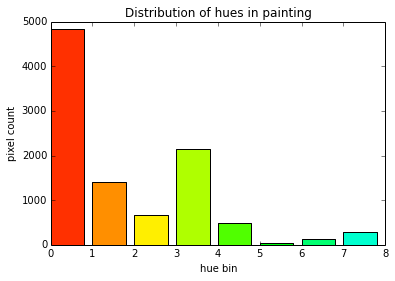

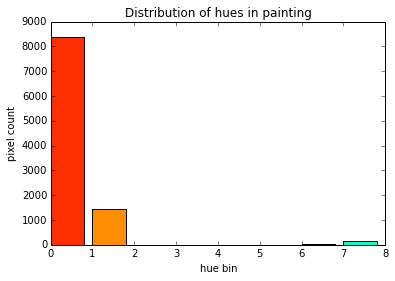

In [20]:
# maybe hue/saturation/value is more interesting!!!
import PBNFeatures.cylindrical as cyl
reload(cyl)

pairnum=999

# show (full) images
#showImage(pairs[pairnum][0])
#showImage(pairs[pairnum][1])

# load miniatures
mini1,mini2 = loadMiniPair(pairs[pairnum])

# compute hue/saturation/value statistics
hsvstats1 = cyl.hsv_stats(cyl.jpg_to_hsv(mini1),hue_bins=8)
hsvstats2 = cyl.hsv_stats(cyl.jpg_to_hsv(mini2),hue_bins=8)

# histograms of hue distribution
reload(cyl)
cyl.plotHueDistribution(hsvstats1['hue_bins'])
cyl.plotHueDistribution(hsvstats2['hue_bins'])

# hsvstats1, hsvstats2

In [21]:
# let's look at some hsv statistics for a set of paintings
# (whole population or a single painter, or whatever)
%matplotlib inline
def hsvStatsPlots(hsvst, nbins=20):
    sat_means = [h['sat_mean'] for h in hsvst]
    sat_stds = [h['sat_std'] for h in hsvst]
    val_means = [h['val_mean'] for h in hsvst]
    val_stds = [h['val_std'] for h in hsvst]
    dom_hue = [h['hue_bins'][0][0] for h in hsvst]
    dom_hue_count = [h['hue_bins'][0][1] for h in hsvst]
    hue_variety = [sum(int(hue[1]>1000) for hue in h['hue_bins']) for h in hsvst]


    # histograms
    import matplotlib.pyplot as plt
    n, bins, patches = plt.hist(sat_means, bins=nbins, normed=True, facecolor='green', alpha=0.75)
    plt.xlabel('Mean saturation')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    n, bins, patches = plt.hist(sat_stds, bins=nbins, normed=True, facecolor='red', alpha=0.75)
    plt.xlabel('Saturation std')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    n, bins, patches = plt.hist(val_means, bins=nbins, normed=True, facecolor='blue', alpha=0.75)
    plt.xlabel('Mean value (brightness)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    n, bins, patches = plt.hist(val_stds, bins=nbins, normed=True, facecolor='green', alpha=0.75)
    plt.xlabel('Value (brightness) std')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    n, bins, patches = plt.hist(dom_hue_count, bins=nbins, normed=True, facecolor='red', alpha=0.75)
    plt.xlabel('Pixels of dominant hue')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # barplots
    tab = rd.table(hue_variety)
    wid = 0.8
    pos = [t[0] for t in tab]
    heights = [t[1] for t in tab]
    plt.xlabel('Number of important hue bins (out of 16)')
    plt.bar(pos, heights, width=wid)
    plt.show()

    tab = rd.table(dom_hue)
    cyl.plotHueDistribution(tab, nhues=16)
    plt.title('Occurrence of dominant hues')
    plt.ylabel('occurrence')
    plt.xlim([0,16])
    plt.show()

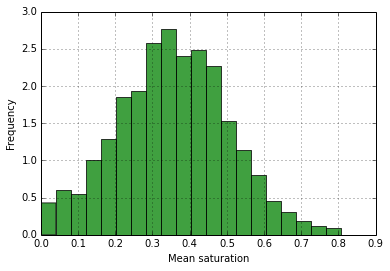

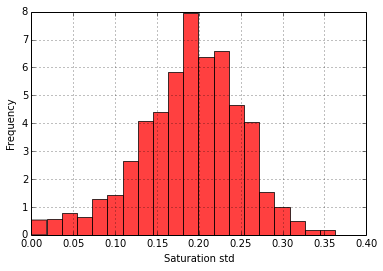

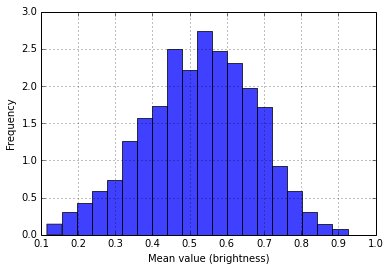

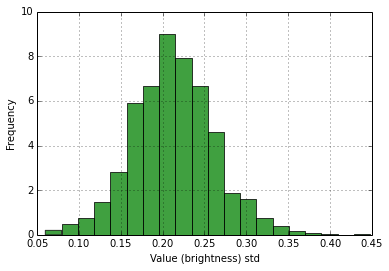

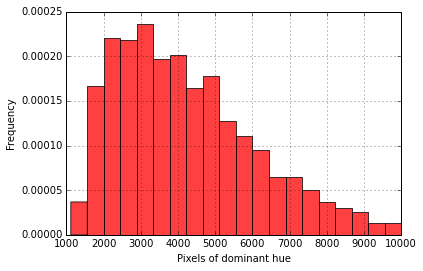

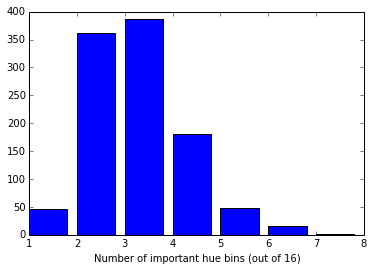

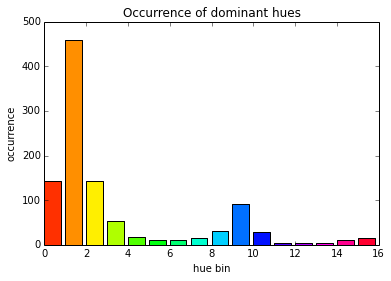

In [22]:
# stats for full population
hsvStatsPlots(hsvstats, nbins=20)

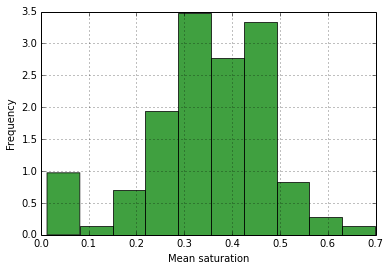

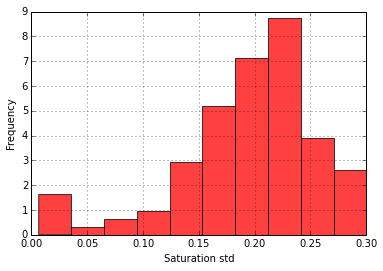

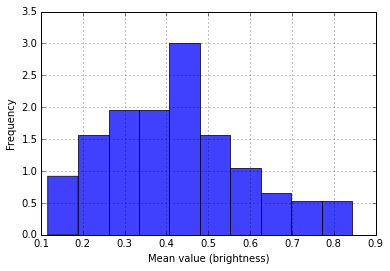

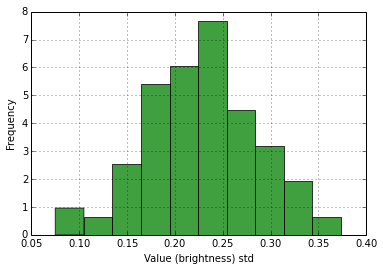

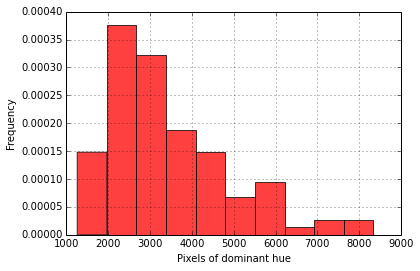

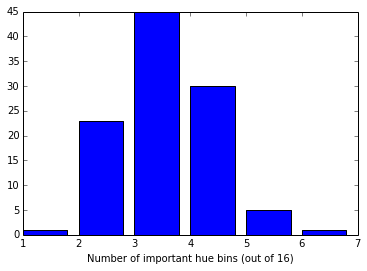

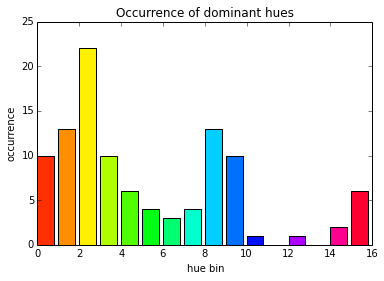

In [23]:
# painter 2
painterNum = 2
paintings = portfolios_uni[painterNum][1]
hsvst = [hsvstats[names.index(p)] for p in paintings]
hsvStatsPlots(hsvst, nbins=10)

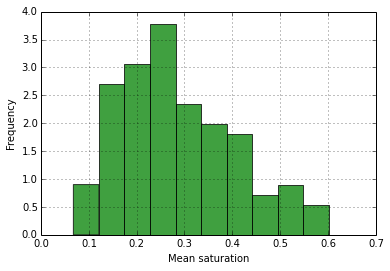

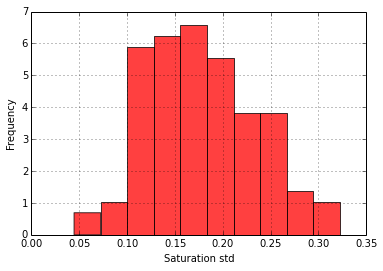

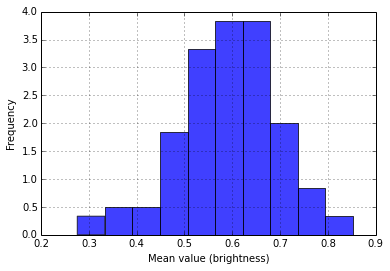

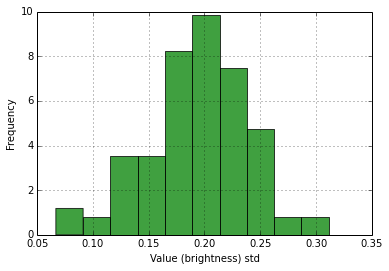

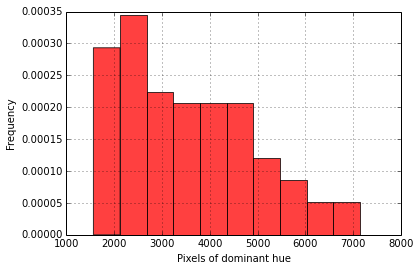

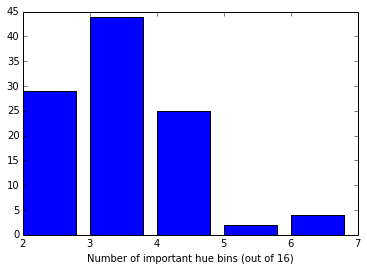

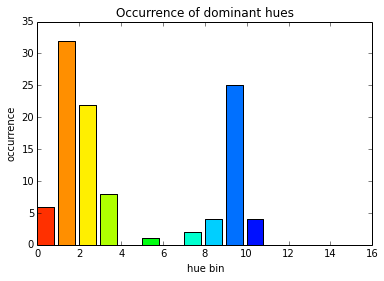

In [24]:
# painter 3
painterNum = 3
paintings = portfolios_uni[painterNum][1]
hsvst = [hsvstats[names.index(p)] for p in paintings]

hsvStatsPlots(hsvst, nbins=10)

mean distances for sames, diffs:

sat_mean:
(0.15004979801499241, 0.16604363061084271)
sat_std:
(0.062602291852328629, 0.065417787946632125)
val_mean:
(0.150866567578125, 0.167359723828125)
val_std:
(0.052172905580263475, 0.05478038934796528)
total_hue_dist:
(26363106.530000001, 30419126.625999998)
dom_hue:
(2.3929999999999998, 2.9180000000000001)
dom_hue_count:
(2030.2650000000001, 2146.0740000000001)
hue_variety:
(1.0369999999999999, 1.0800000000000001)




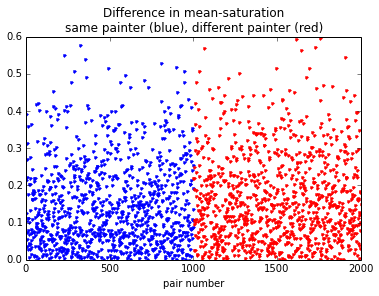

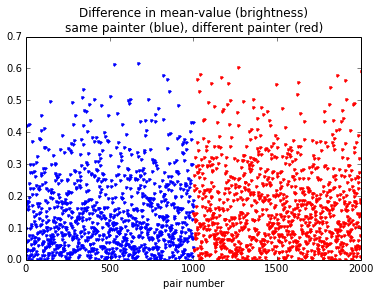

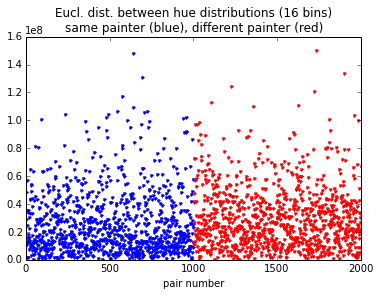

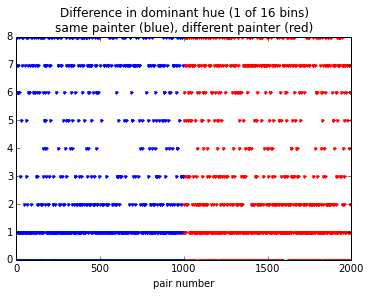

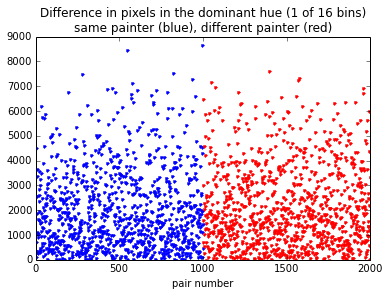

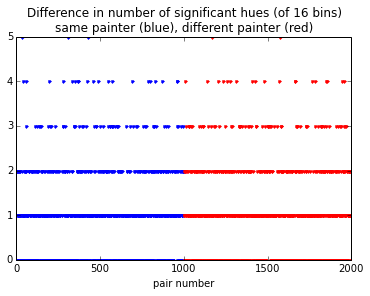

In [25]:
# for all pairs in "pairs", compute difference in 
# saturation and value means and std and the
# distance in dominant hue
import math
sat_mean_dist = []
sat_std_dist = []
val_mean_dist = []
val_std_dist = []
total_hue_dist = []
dom_hue_dist = []
dom_hue_count_dist = []
hue_variety_dist = []
nbins = len(hsvstats[0]['hue_bins'])
hue_ave = sum(pix for i,pix in hsvstats[0]['hue_bins'])/nbins

for pair in pairs:
    inds = names.index(pair[0]), names.index(pair[1])
    sat_mean_dist.append( \
                abs(hsvstats[inds[0]]['sat_mean'] - hsvstats[inds[1]]['sat_mean']))
    sat_std_dist.append( \
                abs(hsvstats[inds[0]]['sat_std'] - hsvstats[inds[1]]['sat_std']))
    val_mean_dist.append( \
                abs(hsvstats[inds[0]]['val_mean'] - hsvstats[inds[1]]['val_mean']))
    val_std_dist.append( \
                abs(hsvstats[inds[0]]['val_std'] - hsvstats[inds[1]]['val_std']))
    hues1 = cyl.completeSortHues(hsvstats[inds[0]]['hue_bins'],nhues=16)
    hues2 = cyl.completeSortHues(hsvstats[inds[1]]['hue_bins'],nhues=16)
    total_hue_dist.append( \
                sum((x1[1]-hues2[i][1])**2 for i,x1 in enumerate(hues1)))
    dom_hue_dist.append( \
                min( \
                    (hsvstats[inds[0]]['hue_bins'][0][0] - \
                     hsvstats[inds[1]]['hue_bins'][0][0]) % nbins, \
                    (hsvstats[inds[1]]['hue_bins'][0][0] - \
                     hsvstats[inds[0]]['hue_bins'][0][0]) % nbins) )
    dom_hue_count_dist.append( \
                abs(hsvstats[inds[0]]['hue_bins'][0][1] - \
                    hsvstats[inds[1]]['hue_bins'][0][1]) )
    # number of hue bins with more than the average number of pixels
    hue_variety_dist.append( \
                abs(sum(int(h[1]>1000) \
                        for h in hsvstats[inds[0]]['hue_bins']) - \
                    sum(int(h[1]>1000) \
                        for h in hsvstats[inds[1]]['hue_bins']) ) )

print('mean distances for sames, diffs:\n')
print('sat_mean:')
print(np.mean(sat_mean_dist[:npairs]), np.mean(sat_mean_dist[-npairs:]))
print('sat_std:')
print(np.mean(sat_std_dist[:npairs]), np.mean(sat_std_dist[-npairs:]))
print('val_mean:')
print(np.mean(val_mean_dist[:npairs]), np.mean(val_mean_dist[-npairs:]))
print('val_std:')
print(np.mean(val_std_dist[:npairs]), np.mean(val_std_dist[-npairs:]))
print('total_hue_dist:')
print(np.mean(total_hue_dist[:npairs]), np.mean(total_hue_dist[-npairs:]))
print('dom_hue:')
print(np.mean(dom_hue_dist[:npairs]), np.mean(dom_hue_dist[-npairs:]))
print('dom_hue_count:')
print(np.mean(dom_hue_count_dist[:npairs]), np.mean(dom_hue_count_dist[-npairs:]))
print('hue_variety:')
print(np.mean(hue_variety_dist[:npairs]), np.mean(hue_variety_dist[-npairs:]))
print('\n')

# plot Euclidean distance in hsv-stats space for
# pairs that are by same artist (blue) and
# pairs that are by different artists (red)
# (still not very exciting!)
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.plot(range(npairs),sat_mean_dist[:npairs],linestyle='none',color='blue',marker='.')
plt.plot(range(npairs,2*npairs),sat_mean_dist[-npairs:],linestyle='none',color='red',marker='.')
plt.title('Difference in mean-saturation\n' \
        +'same painter (blue), different painter (red)')
plt.xlabel('pair number')
plt.show()

fig = plt.figure()
ax = plt.axes()
plt.plot(range(npairs),val_mean_dist[:npairs],linestyle='none',color='blue',marker='.')
plt.plot(range(npairs,2*npairs),val_mean_dist[-npairs:],linestyle='none',color='red',marker='.')
plt.title('Difference in mean-value (brightness)\n' \
        +'same painter (blue), different painter (red)')
plt.xlabel('pair number')
plt.show()

fig = plt.figure()
ax = plt.axes()
plt.plot(range(npairs),total_hue_dist[:npairs],linestyle='none',color='blue',marker='.')
plt.plot(range(npairs,2*npairs),total_hue_dist[-npairs:],linestyle='none',color='red',marker='.')
plt.title('Eucl. dist. between hue distributions (16 bins)\n' \
        +'same painter (blue), different painter (red)')
plt.xlabel('pair number')
plt.show()

fig = plt.figure()
ax = plt.axes()
plt.plot(range(npairs),dom_hue_dist[:npairs],linestyle='none',color='blue',marker='.')
plt.plot(range(npairs,2*npairs),dom_hue_dist[-npairs:],linestyle='none',color='red',marker='.')
plt.title('Difference in dominant hue (1 of 16 bins)\n' \
        +'same painter (blue), different painter (red)')
plt.xlabel('pair number')
plt.show()

fig = plt.figure()
ax = plt.axes()
plt.plot(range(npairs),dom_hue_count_dist[:npairs],linestyle='none',color='blue',marker='.')
plt.plot(range(npairs,2*npairs),dom_hue_count_dist[-npairs:],linestyle='none',color='red',marker='.')
plt.title('Difference in pixels in the dominant hue (1 of 16 bins)\n' \
        +'same painter (blue), different painter (red)')
plt.xlabel('pair number')
plt.show()

fig = plt.figure()
ax = plt.axes()
plt.plot(range(npairs),hue_variety_dist[:npairs],linestyle='none',color='blue',marker='.')
plt.plot(range(npairs,2*npairs),hue_variety_dist[-npairs:],linestyle='none',color='red',marker='.')
plt.title('Difference in number of significant hues (of 16 bins)\n' \
        +'same painter (blue), different painter (red)')
plt.xlabel('pair number')
plt.show()

## Generate texture features

In [30]:
import numpy as np
import PBNFeatures.textureTools as tt
reload(tt)
reload(cyl)

pairnum = 500

# load cutouts
cutout1,cutout2 = loadCutoutPair(pairs[pairnum],topleft=(75,25))
print(cutout1.size)

# display cutout1
cutout1.show()

# compute tuple of hue/saturation/value for each pixel
hsvlist1 = cyl.jpg_to_hsv(cutout1)

# smooth the value channel, rebuild and display
hsvlist1 = tt.defocusValue(hsvlist1)
cutout1.putdata(cyl.hsv_to_rgb(hsvlist1))
cutout1.show()

# again
hsvlist1 = tt.defocusValue(hsvlist1)
cutout1.putdata(cyl.hsv_to_rgb(hsvlist1))
cutout1.show()

# again
hsvlist1 = tt.defocusValue(hsvlist1)
cutout1.putdata(cyl.hsv_to_rgb(hsvlist1))
cutout1.show()


(100, 100)


# Logistic Regression

In [ ]:
# Let's try a logistic regression using a few of the features
# that look a tiny bit promisingimport numpy as np
import Predictors.logRegres as lr
reload(lr)

featureMat = np.matrix([ \
                        len(distance)*[1.0], \
                        distance, \
                        distance3, \
                        sat_mean_dist, \
                        sat_std_dist, \
                        val_mean_dist, \
                        total_hue_dist, \
                        dom_hue_dist, \
                        sharp_dist, \
                        sharp1_d_dist, \
                        sharp2_d_dist
                       ]).transpose()

classLabels = [pair[2] for pair in pairs]

# partition features and classes into training
# and testing sets
splitRatio = 0.8
ntrain = int(0.5*splitRatio*len(featureMat))

featureTrain = np.concatenate((featureMat[:ntrain],featureMat[-ntrain:]),axis=0)
classTrain = np.concatenate((classLabels[:ntrain],classLabels[-ntrain:]),axis=0)

featureTest = featureMat[ntrain:-ntrain]
classTest = classLabels[ntrain:-ntrain]


In [ ]:
# standardize (centre and normalize) training data
obj = lr.standardize(featureTrain[:,1:])
# apply same transformation to testing data
lr.standardize_predict(featureTest[:,1:],obj)

# train logistic regression model
weights = lr.gradAscent(featureTrain,classTrain,alpha=0.001,iterations=200,report=75)
# print out weights
weights

In [ ]:
# in-sample predictions
reload(lr)
predictTrain = lr.predict(featureTrain,weights)
trainConfusion = lr.confusion(classTrain,predictTrain,0.5)
print(trainConfusion)
print('\nin-sample accuracy: ' + str(float(np.trace(trainConfusion))/np.sum(trainConfusion)))

In [ ]:
# out-of-sample predictions
predictTest = lr.predict(featureTest,weights)
testConfusion = lr.confusion(classTest,predictTest,0.5)
print(testConfusion)
print('\nout-of-sample accuracy: ' + str(float(np.trace(testConfusion))/np.sum(testConfusion)))

In [ ]:
# maximum confidence prediction same artist
print((np.argmax(predictTest), max(predictTest)), classTest[np.argmax(predictTest)])
print(featureTest[np.argmax(predictTest)])

showImage(pairs[ntrain+np.argmax(predictTest)][0])
showImage(pairs[ntrain+np.argmax(predictTest)][1])

In [ ]:
# maximum confidence prediction different artist
print((np.argmin(predictTest), min(predictTest)), classTest[np.argmin(predictTest)])
print(featureTest[np.argmin(predictTest)])

showImage(pairs[ntrain+np.argmin(predictTest)][0])
showImage(pairs[ntrain+np.argmin(predictTest)][1])

In [ ]:
%matplotlib inline
rocObj = lr.ROC(classTrain,predictTrain, step=0.1)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.plot(rocObj['fpr'],rocObj['tpr'])
plt.plot([0,1],[0,1],'r--')
plt.show()

In [ ]:
# compute PCA for 16-colour CGA colour distributions in miniatures
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PBNFeatures.paletteTools as pt
import PBNPCA.pca as pbnpca
import os.path
import PIL.Image as Image
#import math
palette = pt.CGApalette(ncolours=16)
nc = len(palette)/3
featureDir = '../Data/FeatureData/'

In [ ]:
# compute the PC of data
reload(pbnpca)
ncomp = 15
pobj = pbnpca.pca(np.array(data),ncomp)

# pc:
pcs = []
for col in xrange(ncomp-1,-1,-1):
    # column to row
    pc = [vec[col] for vec in pobj['eigvecs']]
    # construct a "colours" list out of the pc (clumsy but should be okay)
    pc = [(a,i) for i,a in enumerate(pc)]
    pcs.append(pc)

In [ ]:
# plot leading eigenvectors (PC)
pt.plotColourDistribution(pcs[0],pt.unflatten(palette))
pt.plotColourDistribution(pcs[1],pt.unflatten(palette))
pt.plotColourDistribution(pcs[2],pt.unflatten(palette))
pt.plotColourDistribution(pcs[3],pt.unflatten(palette))
pt.plotColourDistribution(pcs[4],pt.unflatten(palette))
pt.plotColourDistribution(pcs[5],pt.unflatten(palette))
plt.show()

In [ ]:
# project row onto leading PC
pbnpca.pcaProject(data[750],pobj)[-8:]

In [ ]:
# compare full vector and projection onto first 8
print(data[750])
print('\n')
print(pbnpca.pcaTrunc(data[750],pobj,8))

#np.zeros((len(data[0]),1))
#np.array(pobj['meanvec']).reshape((len(data[0]),1))

In [ ]:
# ideas for other features ...
#    saturation, lightness
#    texture, edges, dots
#    size
#    number of significant colours
# neural network idea?  (Auto-encoder-decoder)
# topic (=style) modelling

# contrast detection, "focus and sharpness"